In [11]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Create a trajectory with 2 states

In [53]:
total_s = []
ground_truth = []
for _ in range(7):
    s1_len = int(np.random.normal(100, 5, 1)[0])
    s2_len = int(np.random.normal(30, 5, 1)[0])
    ground_truth += [0]*s1_len + [1]*s2_len
    s1 = list(np.random.normal(10, 2, s1_len))
    s2 = list(np.random.normal(12, 2, s2_len))
    total_s += s1 + s2

### Define an HMM model

In [54]:
total_s = np.array(total_s).reshape(-1, 1)
model = hmm.GaussianHMM(
    n_components=2,
    covariance_type="full",
    min_covar=0.1,
    n_iter=10000,
    params="mtc",
    init_params="mtc",
)
model.startprob_ = [0.5, 0.5]
model.fit(total_s)

GaussianHMM(covariance_type='full', init_params='mtc', min_covar=0.1,
            n_components=2, n_iter=10000, params='mtc')

### Apply a trained model

In [55]:
prediction_hmm = model.predict(total_s)

### Plot trajectory with prediction and ground truth

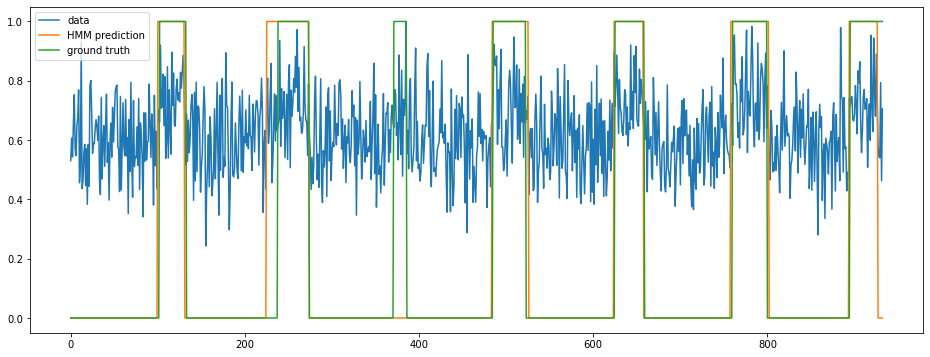

In [60]:
plt.figure(figsize=(16,6))
plt.plot(total_s/np.max(total_s), label = "data")
plt.plot(prediction_hmm, label = "HMM prediction")
plt.plot(ground_truth, label = "ground truth")
plt.legend()